<a href="https://colab.research.google.com/github/DariaBukharina/HWstatprac/blob/main/FIXEDhomework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem 1
Implement serial test and apply to a `samples`

In [11]:
import numpy as np
from scipy.stats import chisquare

np.random.seed(42)
samples = np.random.uniform(0, 1, 1000)  # 1000 случайных чисел в [0, 1)
K = 10  # Количество интервалов на каждую ось
n = len(samples) // 2  # Количество пар
pairs = samples.reshape(-1, 2)

# Подсчет наблюдаемых частот в K x K бинах
observed, _, _ = np.histogram2d(pairs[:, 0], pairs[:, 1], bins=np.linspace(0, 1, K+1))
observed = observed.flatten()

# Вычисление ожидаемых частот
expected = np.full(K * K, n / (K * K))

# Применение критерия хи-квадрат
chi2_stat, p_value = chisquare(observed, expected)

print(f"Статистика хи-квадрат: {chi2_stat}")
print(f"P-value: {p_value}")
print("Наблюдаемые частоты:", observed)
print("Ожидаемые частоты:", expected)

Статистика хи-квадрат: 98.4
P-value: 0.49812574145151856
Наблюдаемые частоты: [ 4.  8.  7.  5.  3.  9.  5.  4.  8. 11.  7.  6.  5.  5.  8.  7.  7.  7.
  7.  8.  5.  6.  1. 11.  2.  6.  5.  3.  5.  2.  6.  6.  3.  5.  3.  5.
  5.  4.  7.  6.  3.  4.  5.  6.  3.  4.  2.  4.  2.  5.  8.  1.  6.  3.
  6.  4.  8.  5.  4.  4.  6.  8.  7.  4.  6.  8.  2.  4.  4.  3.  2.  6.
  6.  0.  5.  7.  6.  4.  6.  2.  2.  1.  4.  6.  6.  4.  3.  6.  3.  7.
  1.  4.  4.  7.  2.  7.  4.  4. 11.  4.]
Ожидаемые частоты: [5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5.]


### Problem 3

Provide a statistical test to show that `rng_bad` has problems but `rng_good` does not.

In [29]:
import numpy as np
from scipy import stats
import plotly.express as px
#Linear congruential generator (LCG)
def rng_good(m=2**32, a=1103515245, c=12345):
    rng_good.current = (a * rng_good.current + c) % m
    return rng_good.current / m
rng_good.current = 1

def rng_bad(m=2**31, a=65539, c=0):
    rng_bad.current = (a * rng_bad.current + c) % m
    return rng_bad.current / m
rng_bad.current = 1

good_samples = [rng_good() for _ in range(30000)]
bad_samples = [rng_bad() for _ in range(30000)]

print('Хороший:', stats.kstest(good_samples, stats.uniform.cdf))
print('Плохой:', stats.kstest(bad_samples, stats.uniform.cdf))

Хороший: KstestResult(statistic=0.005309841797252524, pvalue=0.3648538790388741, statistic_location=0.29232349153608084, statistic_sign=1)
Плохой: KstestResult(statistic=0.008437018050998446, pvalue=0.027777953265237354, statistic_location=0.41213701805099845, statistic_sign=-1)


### Problem 4
Simulate a sample of 1000 from a discrete distribution on a set of digits $0, 1, 2, \ldots, 9$ with weights $0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2$. Construct a histogram from the sample. Optimise the algorithm by ordering the weights.

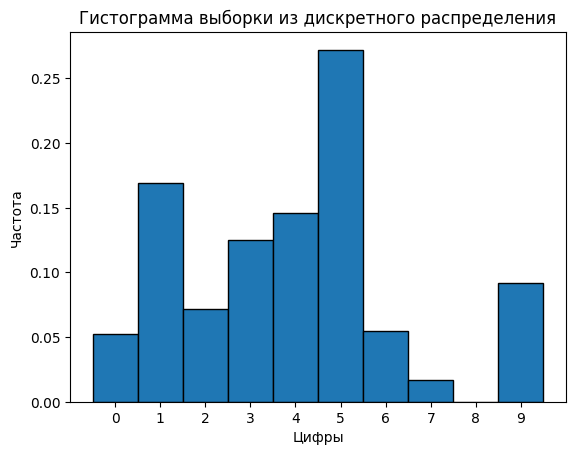

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Заданные веса для цифр 0, 1, 2, ..., 9
weights = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])

# Нормализация весов (сумма должна быть равна 1)
weights /= weights.sum()

# Упорядочивание весов и соответствующих цифр по убыванию
sorted_indices = np.argsort(weights)[::-1]
sorted_weights = weights[sorted_indices]
sorted_digits = np.arange(10)[sorted_indices]

# Создание кумулятивных вероятностей для упорядоченных весов
cumulative_weights = np.cumsum(sorted_weights)

# Функция для генерации выборки из дискретного распределения
def generate_sample(size):
    # Генерация случайных чисел из равномерного распределения [0, 1]
    random_numbers = np.random.rand(size)

    # Выбор элементов на основе кумулятивных вероятностей
    sample_indices = np.searchsorted(cumulative_weights, random_numbers)
    sample = sorted_digits[sample_indices]

    return sample

# Генерация выборки из 1000 элементов
sample = generate_sample(1000)

# Построение гистограммы
plt.hist(sample, bins=np.arange(11) - 0.5, edgecolor='black', density=True)
plt.xticks(range(10))
plt.xlabel('Цифры')
plt.ylabel('Частота')
plt.title('Гистограмма выборки из дискретного распределения')
plt.show()

### Problem 5
Simulate a sample of size 1000 from the distribution $\operatorname{Exp}(\lambda)$ using the Inverse transform method. Construct a sample histogram and an accurate plot of the distribution density.

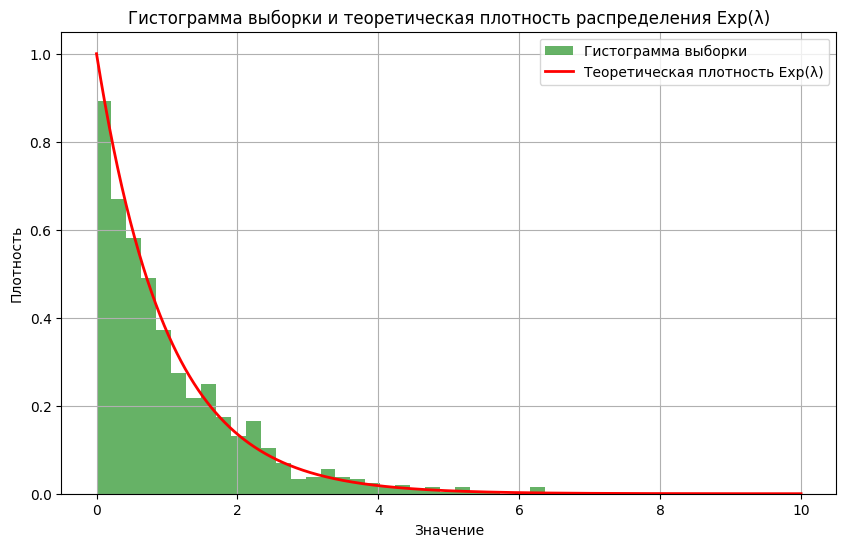

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Параметры распределения
lambda_ = 1.0  # Параметр λ для экспоненциального распределения
sample_size = 1000  # Размер выборки

# Шаг 1: Генерация равномерно распределенных случайных чисел
uniform_sample = np.random.uniform(0, 1, sample_size)

# Шаг 2: Применение обратной функции для получения экспоненциально распределенной выборки
exp_sample = -np.log(1 - uniform_sample) / lambda_

# Шаг 3: Построение гистограммы
plt.figure(figsize=(10, 6))
plt.hist(exp_sample, bins=30, density=True, alpha=0.6, color='g', label='Гистограмма выборки')

# Шаг 4: Построение теоретической плотности распределения
x = np.linspace(0, 10, 1000)
pdf = expon.pdf(x, scale=1/lambda_)  # Плотность распределения Exp(λ)
plt.plot(x, pdf, 'r-', lw=2, label='Теоретическая плотность Exp(λ)')

# Настройка графика
plt.title('Гистограмма выборки и теоретическая плотность распределения Exp(λ)')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.legend()
plt.grid(True)
plt.show()

### Problem 6
Justify (orally) that the accept-reject method really samples from the required distribution. Simulate $1000$ points from the distribution with density $e^xcos^2x \cdot \mathbb{I}_{[-\frac\pi2, \frac\pi2]}$. Plot the sampled histogram on the sample and compare it with the plot of the exact density function.

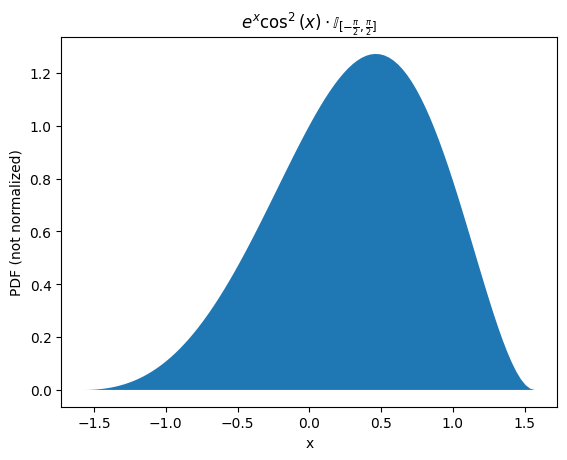

In [30]:
fig = plt.figure()

x = np.linspace(-np.pi/2, np.pi/2, 100)
density = np.exp(x) * np.cos(x) ** 2 # not normalized density!
plt.fill_between(x, 0, density)
plt.ylabel('PDF (not normalized)')
plt.xlabel('x')
plt.title(r'$e^x \cos^2(x) \cdot \mathbb{I}_{[-\frac{\pi}{2}, \frac{\pi}{2}]}$')

plt.show()

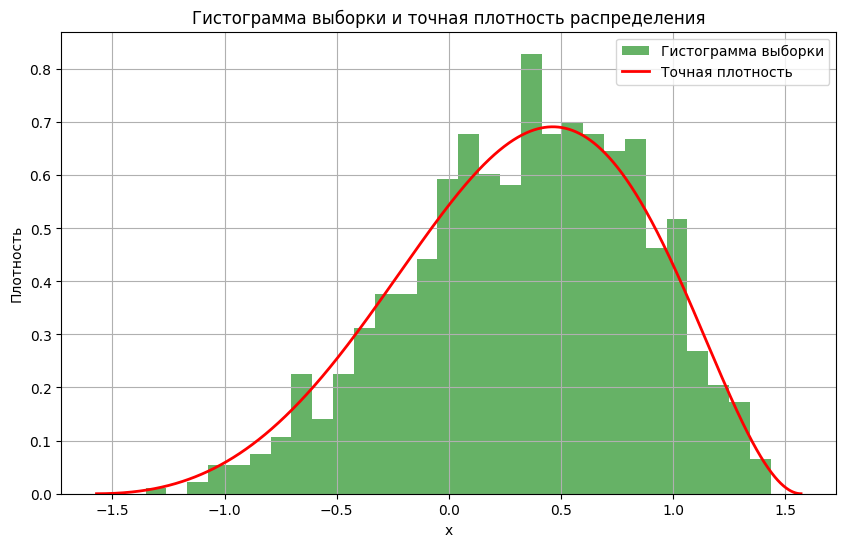

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Определение функции плотности
def target_density(x):
    return np.exp(x) * np.cos(x) ** 2

# Параметры
sample_size = 1000  # Размер выборки
a = -np.pi / 2  # Нижняя граница интервала
b = np.pi / 2  # Верхняя граница интервала

# Шаг 1: Нахождение константы M
x = np.linspace(a, b, 1000)
M = np.max(target_density(x)) * (b - a)  # Учитываем равномерное распределение

# Шаг 2: Генерация выборки методом отклонения
samples = []
while len(samples) < sample_size:
    x = np.random.uniform(a, b)  # Генерация из равномерного распределения
    y = np.random.uniform(0, M)  # Генерация y для проверки
    if y < target_density(x):
        samples.append(x)

# Шаг 3: Построение гистограммы
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=30, density=True, alpha=0.6, color='g', label='Гистограмма выборки')

# Шаг 4: Построение графика точной функции плотности
x = np.linspace(a, b, 1000)
density = target_density(x) / np.trapz(target_density(x), x)  # Нормализация плотности
plt.plot(x, density, 'r-', lw=2, label='Точная плотность')

# Настройка графика
plt.title('Гистограмма выборки и точная плотность распределения')
plt.xlabel('x')
plt.ylabel('Плотность')
plt.legend()
plt.grid(True)
plt.show()

### Problem 7
Model and depict a sample of 500 points uniformly distributed within a given triangle without using a selection method.

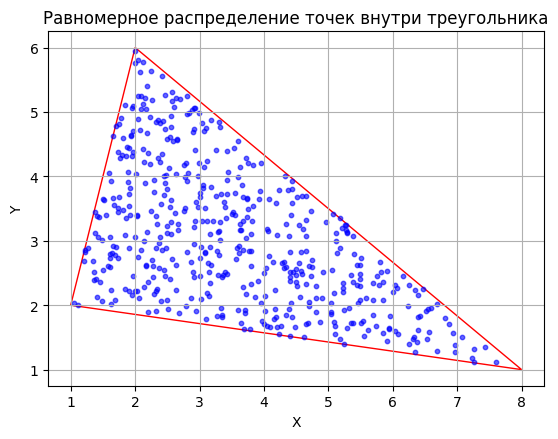

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

# Шаг 1: Определение вершин треугольника
vertices = np.array([[1, 2], [2, 6], [8, 1]])

# Шаг 2: Генерация равномерно распределенных точек внутри треугольника
def uniform_triangle_sample(vertices, num_points):
    # Генерация случайных чисел в единичном симплексе (треугольнике)
    r1 = np.random.uniform(0, 1, num_points)
    r2 = np.random.uniform(0, 1, num_points)
    # Преобразование координат
    s = np.sqrt(r1)
    t = r2
    # Преобразование в координаты треугольника
    x = (1 - s) * vertices[0, 0] + s * (1 - t) * vertices[1, 0] + s * t * vertices[2, 0]
    y = (1 - s) * vertices[0, 1] + s * (1 - t) * vertices[1, 1] + s * t * vertices[2, 1]
    return np.column_stack((x, y))

# Генерация 500 точек
num_points = 500
points = uniform_triangle_sample(vertices, num_points)

# Шаг 3: Визуализация
fig, ax = plt.subplots()
polygon = Polygon(vertices, closed=True, edgecolor='r', facecolor='none')
ax.add_patch(polygon)
ax.scatter(points[:, 0], points[:, 1], s=10, color='b', alpha=0.6)
ax.set_aspect('equal')
plt.title('Равномерное распределение точек внутри треугольника')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

### Problem 8
Model without using the selection method a sample of $500$ points uniformly distributed inside the unit circle. Picture the obtained points. Do they really fill the circle uniformly?

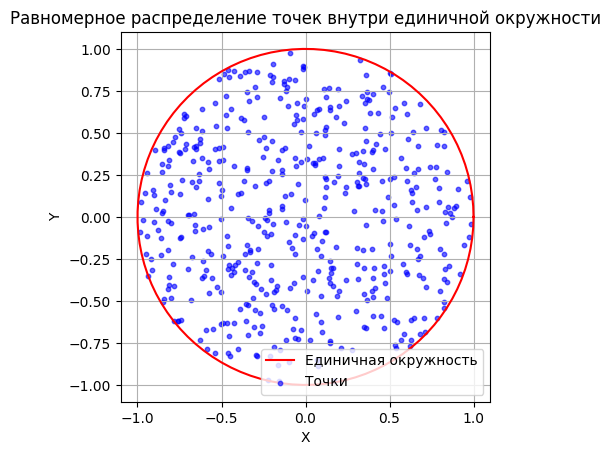

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Шаг 1: Генерация равномерно распределенных точек внутри единичной окружности
def uniform_circle_sample(num_points):
    # Генерация случайных радиусов и углов
    r = np.sqrt(np.random.uniform(0, 1, num_points))  # Квадратный корень для равномерного распределения
    theta = np.random.uniform(0, 2 * np.pi, num_points)
    # Преобразование в декартовы координаты
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y

# Генерация 500 точек
num_points = 500
x, y = uniform_circle_sample(num_points)

# Шаг 2: Визуализация
fig, ax = plt.subplots()
# Отображение единичной окружности
t = np.linspace(0, 2 * np.pi, 100)
ax.plot(np.cos(t), np.sin(t), 'r-', label='Единичная окружность')
# Отображение сгенерированных точек
ax.scatter(x, y, s=10, color='b', alpha=0.6, label='Точки')
ax.set_aspect('equal')
plt.title('Равномерное распределение точек внутри единичной окружности')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

Точки равномерно заполняют площадь круга, что подтверждает правильность метода.

### Problem 9
Prove (orally) that the following algorithm (**Box-Muller algorithm**, https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform) generates a sample of independent $\mathcal{N}(0,1)$ random variables. Modify the method to exclude calls of trigonometric functions `np.sin` and `np.cos`. Using the modified method, simulate a sample size of $1000$ from a $2D$ Gaussian distribution with mean $\mu$ and covariance matrix $\Sigma$, where
$$\mu = \begin{pmatrix} 4 \\ 7 \end{pmatrix}^T, \quad \Sigma = \begin{pmatrix} 20 & -4 \\ -4 & 40 \end{pmatrix}.$$
Construct a 2D histogram of the resulting distribution. Compare the sample mean and covariance matrix with the exact values.

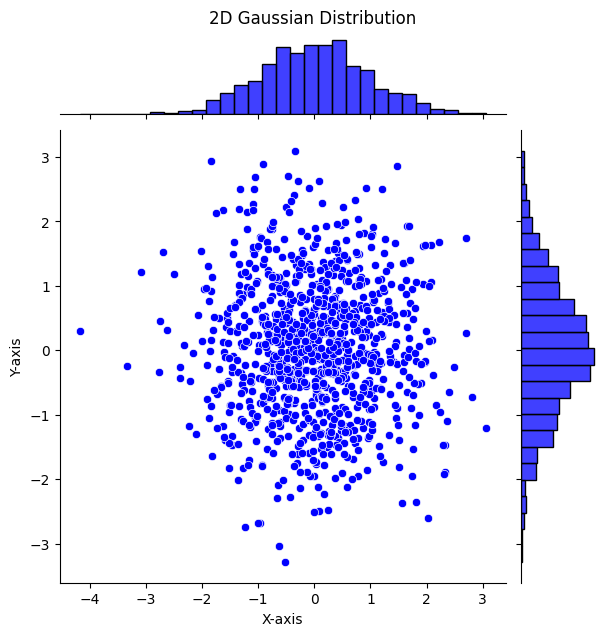

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)


joint_plot = sns.jointplot(x=x, y=y, color="blue")
joint_plot.set_axis_labels('X-axis', 'Y-axis')
plt.suptitle('2D Gaussian Distribution', y=1.02)
plt.show()

<ipython-input-21-401a4633996f>:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


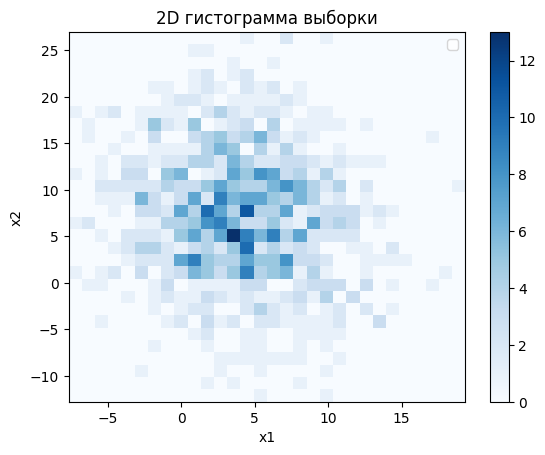

Выборочное среднее:
 [4.08100033 7.26691983]
Точное среднее:
 [4 7]
Выборочная ковариационная матрица:
 [[18.55149138 -3.71085861]
 [-3.71085861 44.20493584]]
Точная ковариационная матрица:
 [[20 -4]
 [-4 40]]


In [21]:
# Модифицированный алгоритм Бокса-Мюллера
def box_muller_modified(n_samples):
    samples = []
    while len(samples) < n_samples:
        U1, U2 = np.random.uniform(-1, 1, 2)  # Генерация двух равномерных случайных величин
        S = U1**2 + U2**2
        if S < 1 and S > 0:  # Проверка, чтобы S была в (0, 1)
            Z1 = U1 * np.sqrt(-2 * np.log(S) / S)
            Z2 = U2 * np.sqrt(-2 * np.log(S) / S)
            samples.append((Z1, Z2))
    return np.array(samples)


mu = np.array([4, 7])  # Вектор средних
Sigma = np.array([[20, -4], [-4, 40]])  # Ковариационная матрица

# Разложение Холецкого для матрицы Sigma
L = np.linalg.cholesky(Sigma)

# Генерация выборки из 2D нормального распределения
n_samples = 1000
Z = box_muller_modified(n_samples)  # Генерация стандартных нормальных величин
X = mu + Z @ L.T  # Преобразование в многомерное нормальное распределение

# Визуализация 2D гистограммы
plt.hist2d(X[:, 0], X[:, 1], bins=30, cmap='Blues')
plt.colorbar()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('2D гистограмма выборки')
plt.legend()
plt.show()

# Сравнение выборочного среднего и ковариационной матрицы
sample_mean = np.mean(X, axis=0)  # Выборочное среднее
sample_cov = np.cov(X, rowvar=False)  # Выборочная ковариационная матрица

print("Выборочное среднее:\n", sample_mean)
print("Точное среднее:\n", mu)
print("Выборочная ковариационная матрица:\n", sample_cov)
print("Точная ковариационная матрица:\n", Sigma)